# 10일차 실습 - 통계 기초

## 3. 자료의 정리

### 3.3 양적 자료의 정리

### [실습] 도수분포표 만들기

In [ ]:
import numpy as np
import pandas as pd
import math

data = [26,31,28,38,41,26,18,16,25,29,
       39,38,38,40,43,38,39,41,41,40,
       26,19,39,28,43,34,21,41,29,30,
       12,22,45,34,29,26,29,58,42,16,
       41,42,38,42,28,42,39,41,39,43]

# 도수분포표 만드는 순서
# 1.k(계급 수)
k = 5
# 2.R(max - min)
R = max(data) - min(data)
# 3.계급간격
w = math.ceil(R/k)
# 4.시작계급값
s = min(data) - 0.5
print(f'계급수k: {k}, R: {R}, 계급간격w: {w}, 시작계급값s: {s}')

# 전체 계급구간
bins = np.arange(s, max(data)+w, step=w)
print(f'계급간격bins: {bins}')

# 계급구간
index = [f'{bins[i]}~{bins[i+1]}' for i in range(len(bins)) if i<len(bins)-1]
# index = []
# for i in range(len(bins)) :
#     if i < len(bins)-1:
#         index.append(f'{bins[i]}~{bins[i+1]}')
print(f'계급구간index: {index}')

# 도수
hist, bins = np.histogram(data, bins)
print(f'도수: {hist}')

# DataFrame으로 나타내기
df = pd.DataFrame(hist, index=index, columns=['도수'])
df.index.name = '계급간격'

# 상대도수
df['상대도수'] = [ x/sum(hist) for x in hist]

# 누적도수
df['누적도수'] = [sum(hist[:i+1]) if i>0 else hist[i] for i in range(k)]
# tmp = []
# for i in range(k):
#     if i > 0: 
#         tmp.append(sum(hist[:i+1]))
#     else: 
#         tmp.append(hist[i])
# df['누적도수'] = tmp   

# 누적상대도수
tmp = df['누적도수'].values
df['누적상대도수'] = [sum(tmp[:i+1]) if i>0 else tmp[i] for i in range(k)]

df['계급값'] = [ (bins[i]+bins[i+1])/2 for i in range(k)]
df

계급수k: 5, R: 46, 계급간격w: 10, 시작계급값s: 11.5
계급간격bins: [11.5 21.5 31.5 41.5 51.5 61.5]
계급구간index: ['11.5~21.5', '21.5~31.5', '31.5~41.5', '41.5~51.5', '51.5~61.5']
도수: [ 6 15 20  8  1]


,도수,상대도수,누적도수,누적상대도수,계급값
계급간격,,,,,
11.5~21.5,6,0.12,6,6,16.5
21.5~31.5,15,0.30,21,27,26.5
31.5~41.5,20,0.40,41,68,36.5
41.5~51.5,8,0.16,49,117,46.5
51.5~61.5,1,0.02,50,167,56.5


#### 도수히스토그램 나타내기

In [1]:
import matplotlib.pyplot as plt

plt.hist(data, bins=5, edgecolor='b')
plt.show()

NameError: ignored

#### 도수다각형 그리기

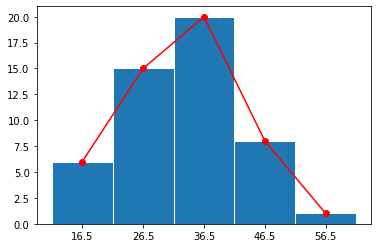

In [ ]:
X = df.계급값
Y = df.도수

plt.bar(X, Y, edgecolor='w', width=10)
plt.plot(X, Y, 'ro-')
plt.xticks(X)
plt.show()

### [실습] 상자그림(boxplot) 그리기

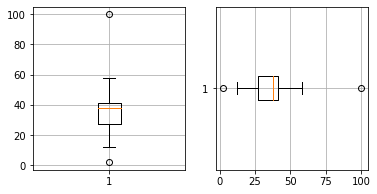

In [ ]:
import matplotlib.pyplot as plt

S = [2,31,27,38,42,26,18,17,25,29,
        39,38,38,40,46,38,39,41,41,40,
        26,19,39,28,45,34,21,41,30,30,
        12,22,48,34,29,26,29,58,43,16,
        42,44,38,44,28,43,39,42,39,100]

plt.figure(figsize=(6, 3))
plt.subplot(121)
plt.boxplot(S)
plt.grid()

plt.subplot(122)
plt.boxplot(S, vert=False)
plt.grid()

plt.show()

## 05. 확률

### 복원추출 & 비복원추출

In [ ]:
import numpy as np

# 복원추출
a = np.random.choice(5, 3, replace=True)  #0~4(arange(5))중 3개 추출 
print(a)
# 비복원추출
a = np.random.choice(5, 3, replace=False)  #0~4중 3개 추출 
print(a)

[2 2 4]
[4 3 1]


### 통계적 확률

In [ ]:
import random
import math

ns = [50,100,500,1000,2000,2500,5000,10000] # 시행횟수
rs = []   # 앞면의 수
ps = []   # 앞면의 상대도수

for n in ns:
    tmp= []
    for i in range(n):
        tmp.append( random.choice(['H','T']) )
    r = tmp.count('H')
    rs.append(round(r))
    ps.append(round(r/n,3))


# pandas 테이블 형태로 보여주기    
import pandas as pd
dics = dict()
for idx, n in enumerate(ns):
    key = ns[idx]
    values = [rs[idx], ps[idx]]
    dics[key] = values

df = pd.DataFrame(dics, columns=ns, index=['앞면의수','앞면의상대도수'])
df

,50,100,500,1000,2000,2500,5000,10000
앞면의수,27.00,54.00,269.000,485.000,992.000,1278.000,2474.000,5089.000
앞면의상대도수,0.54,0.54,0.538,0.485,0.496,0.511,0.495,0.509


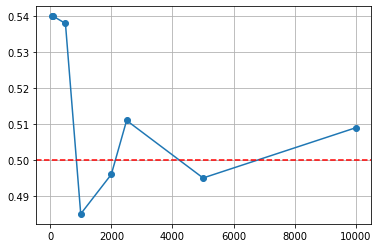

In [ ]:
import matplotlib.pyplot as plt
    
x = ns
y = ps

plt.plot(x, y, 'o', linestyle='solid' )
plt.axhline(0.5, c='r', ls='--')
plt.grid()
plt.show()

## 06. 확률변수

### [실습] 확률구하고 그래프로 표시하기

- 전체 초등학생의 수 : 10만명
- 평균 키: 140, 표준편차: 5
- 무작위로 한 명(x) 추출했을 때 (145<= x < 150) 확률은?

[145<= x < 150]인 확률: 0.13627


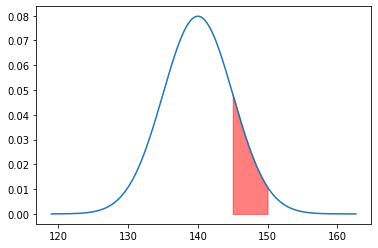

In [ ]:
# 1.평균 140, 표준편차 5인 샘플 데이터 100000건 발생
N, mean, std = 100000, 140, 5
datas = np.random.randn(N)*std + mean
datas

# 2. 145<= x < 150 인 확률
prob = len( [ x for x in datas if 145<=x<150 ] ) / N
print(f'[145<= x < 150]인 확률: {prob}')

# 3. 확률을 그래프로 그려보기
# 히스토그램으로 그래프 그려보기
import matplotlib.pyplot as plt
# plt.hist(datas, bins=100)
# plt.show()

# 확률밀도함수(pdf)에 대한 표준정규분포 나타내기
from scipy.stats import norm 
datas.sort()
y = norm.pdf(datas, mean, std) 
plt.plot(datas, y)
plt.fill_between(datas, y, 
                 where=(datas>=145)&(datas<150), color='r', alpha=0.5)
plt.show()


## 07. 확률분포

(array([0, 1]), <function Bern.<locals>.f at 0x0000015E5DBC45E0>)


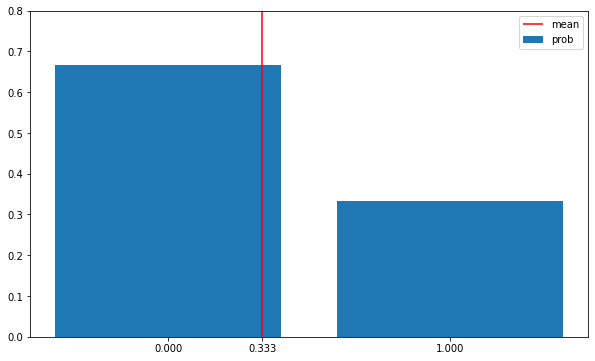

In [ ]:
# 평균=기대값 함수
def E(X):
    x_set, f = X
    return np.sum([x_k * f(x_k) for x_k in x_set])

# 분산 함수
def V(X):
    x_set, f = X
    mean = E(X)
    return np.sum([(x_k - mean)**2 * f(x_k) for x_k in x_set])


# 확률 함수
def check_prob(X):
    x_set, f = X
    prob = np.array([ f(x_k) for x_k in x_set])  
    
    print(f'기대값 E(X): {E(X):.4}')
    print(f'분산   V(X): {V(X):.4}')
        
    
# 확률 그래프
def plot_prob(X):
    x_set, f = X
    prob = np.array([ f(x_k) for x_k in x_set]) 
    
    fig = plt.figure(figsize=(10,6))
    ax  = fig.add_subplot(111) # (1,1,1)
    
    ax.bar(x_set, prob, label='prob')
    ax.vlines(E(X), 0, 1, label='mean', colors='red') #기대값:평균
    ax.set_xticks(np.append(x_set, E(X)))  #x축의 값 출력
    ax.set_ylim(0, prob.max()*1.2)         #y축의 한계 지정
    ax.legend()
    
    plt.show()  

### 베르누이 분포

In [ ]:
#베르누이분포
def Bern(p):
    x_set = np.array([0,1])
    
    def f(x):
        if x in x_set:
            return p**x * (1-p)**(1-x)
        else:
            return 0
        
    return x_set, f


p = 1/3
X = Bern(p)
print(X)

plot_prob( X )

### 이항분포

기대값 E(X): 1.25
분산   V(X): 0.9375


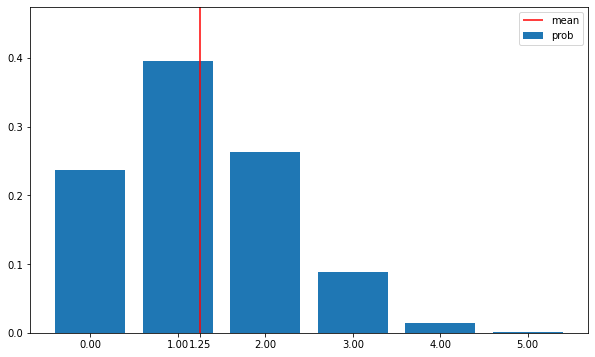

In [ ]:
#scipy패키지의 special모듈에 있는 comb함수 사용
from scipy.special import comb

def Bin(n, p):
    x_set = np.arange(n+1)
    
    def f(x):
        if x in x_set:
            return comb(n,x) * p**x * (1-p)**(n-x)
        else:
            return 0
        
    return x_set, f

n = 5    # n의 개수를 크게 해보기 --> 그래프가 종모양으로 변경됨
p = 0.25   # 0.3, 0.5, 0.7 변경해보기
X = Bin(n,p)
X

# 기대값과 분산
check_prob(X)

# 그래프
plot_prob(X)

### 연속확률분포

### 정규분포

In [ ]:
#𝑍 ~ N(0,1) 정규화를 따른 정규분포
def N(mu, sigma):
    x_range = [- np.inf, np.inf]
    def f(x):
        return 1 / np.sqrt(2 * np.pi * sigma**2) *\
                    np.exp(-(x-mu)**2 / (2 * sigma**2))
    return x_range, f


#X ~ N(2, 0.5^2 )
mu, sigma = 2, 0.5
X = N(mu, sigma)

-------

# 파이썬라이브러리 - Seaborn

### seaborn 설치하기

In [ ]:
!pip install seaborn

### seaborn 설치 확인하기

In [ ]:
import seaborn

seaborn.__version__

'0.11.2'

## Seaborn 사용 예제

### 1. Matplotlib과 기본 그래프 비교

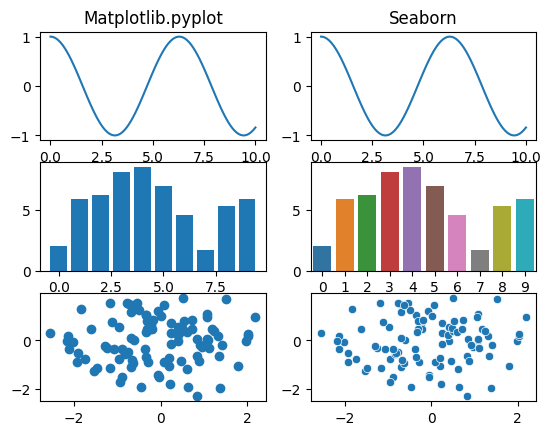

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# warning 안나타나게 하는 방법
import warnings
warnings.filterwarnings(action='ignore')

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['figure.figsize'] = (6, 4)
plt.style.use('default')

# 선 그래프
X = np.linspace(0, 10, 100)
Y = np.cos(X)
plt.subplot(3,2,1)
plt.plot(X, Y)
plt.title('Matplotlib.pyplot')
plt.subplot(3,2,2)
sns.lineplot(X, Y)
plt.title('Seaborn')

# 막대 그래프
X = np.arange(10)
Y = np.random.uniform(1,10,10)
plt.subplot(3,2,3)
plt.bar(X, Y)
plt.subplot(3,2,4)
sns.barplot(X, Y)


# 점 그래프
X = np.random.randn(100)
Y = np.random.randn(100)
plt.subplot(3,2,5)
plt.scatter(X, Y)
plt.subplot(3,2,6)
sns.scatterplot(X, Y)

plt.show()

### 2. Seaborn 내장 Dataset 사용해서 그래프 그리기

- 내장 Dataset csv파일 위치 : https://github.com/mwaskom/seaborn-data

#### - seaborn 데이터셋 목록

In [ ]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

#### - seaborn 데이터셋 사용방법

In [ ]:
# 사이킷런 빌트인 데이터셋(sklearn.datasets): 붓꽃
from sklearn.datasets import load_iris
iris = load_iris()
iris

In [ ]:
# seaborn 빌트인 데이터셋 : tips
sns.load_dataset('tips').head(3) 
# type(sns.load_dataset('tips'))

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


#### -변수 사이의 관계 그래프로 나타내기 : pairplot()

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')


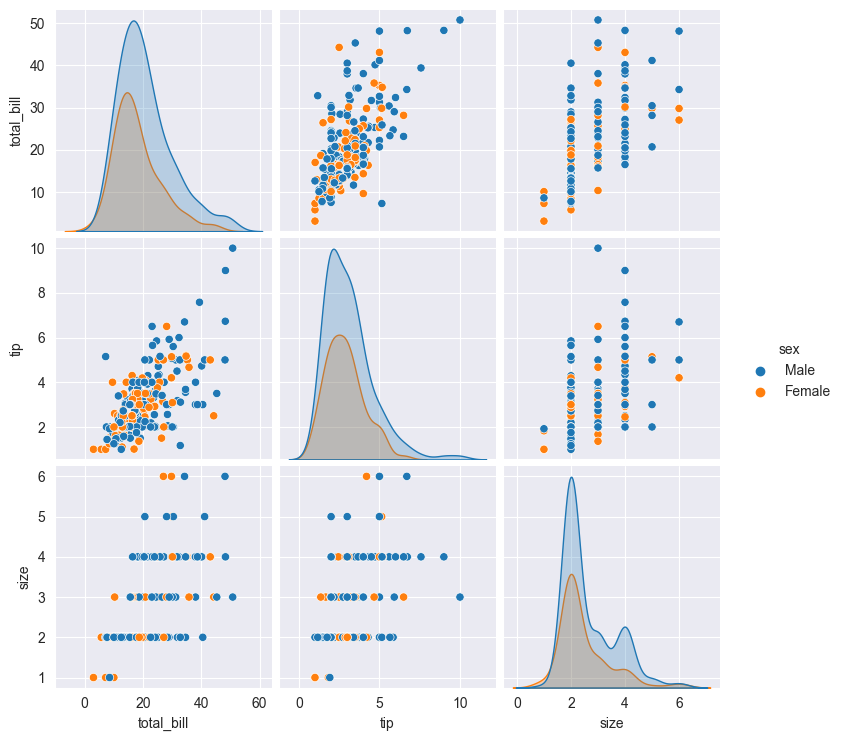

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

tips = sns.load_dataset('tips')
print(tips.columns)

sns.set_style('darkgrid')
sns.pairplot(tips, hue='sex') # 두 변수 조합을 한번에 histogram형태로
# sns.pairplot(tips, hue='sex', height=3, aspect=4/3)